Переменные в Python в корне отличаются от переменных в языках C и C++. По сути, их просто нет в Python. Вместо переменных здесь имена. Чаще всего можно воспринимать имена в Python в качестве переменных, но необходимо понимать разницу.

Переменные в C и C++

Возьмём код, который определяет переменную num:

In [ ]:
int num = 101;

Исполнение этой строки кода проходит через несколько этапов:

выделение достаточного количества памяти для числа
присвоение этому месту в памяти значения 101 отображение, что num указывает на это значение

Упрощённо память может выглядеть так:

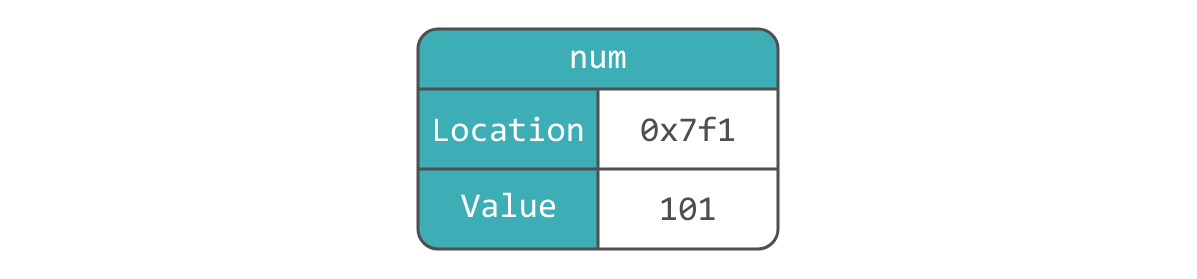

In [1]:
from IPython.display import Image, display

name = 'Новый проект (3).png'
display(Image(filename=f'D:\\images\\{name}'))

Здесь переменная num имеет виртуальный адрес 0x7f1 и значение 101. Если позднее нам захочется изменить значение num, это можно сделать так:

In [ ]:
num = 102;

Этот код присваивает переменной num новое значение 102, тем самым перезаписывая предыдущее значение. Это означает, что переменная num изменяема. Обновлённая схема памяти для нового значения:

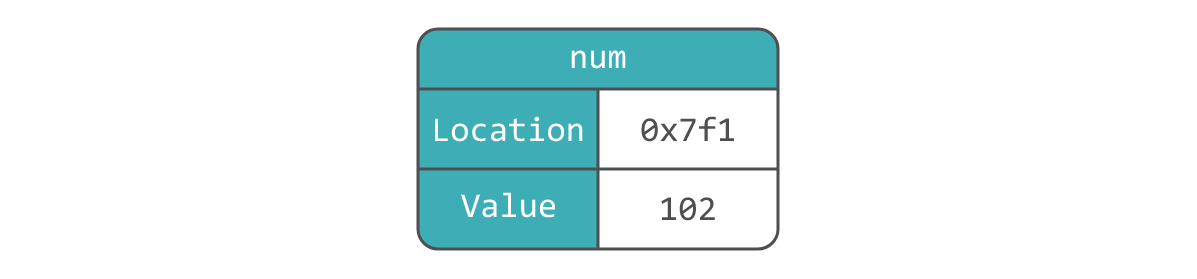

In [2]:
from IPython.display import Image, display

name = 'Новый проект (4).png'
display(Image(filename=f'D:\\images\\{name}'))

Обратите внимание, что расположение num в памяти не поменялось, только само значение. Это говорит о том, что num — это место в памяти, а не просто имя. Можно сказать, что переменная num владеет местом в памяти. По сути, num — это пустая коробка, которая может содержать лишь одно целое число (тип int).

Когда мы присваиваем num какое-то значение, мы тем самым помещаем значение в коробку, принадлежащую num. При этом создать новую переменную num1 можно следующим образом:

In [ ]:
int num1 = num;

Этот код создаёт новую коробку под названием num1 и копирует в неё значение из num. Теперь схема памяти выглядит так:

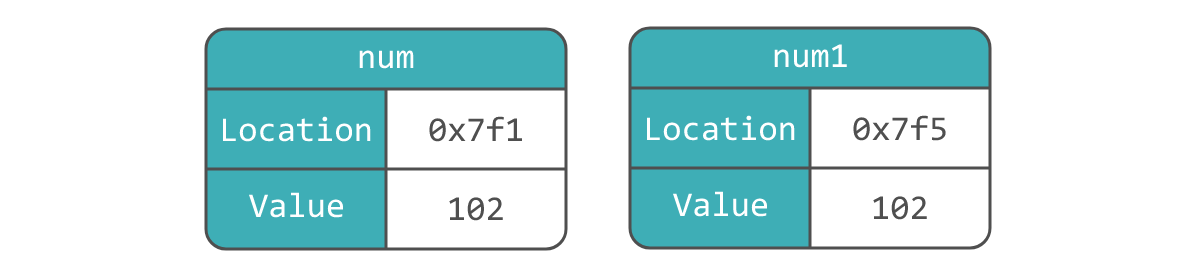

In [3]:
from IPython.display import Image, display

name = 'Новый проект (1) (2).png'
display(Image(filename=f'D:\\images\\{name}'))

Обратите внимание на местоположение num1 — 0x7f5. Хотя в num1 и было скопировано значение num, однако переменная num1 владеет новым адресом в памяти. Следовательно, мы можем перезаписывать значение num1, не влияя на num

In [ ]:
num1 = 103;

Теперь схема памяти выглядит так:

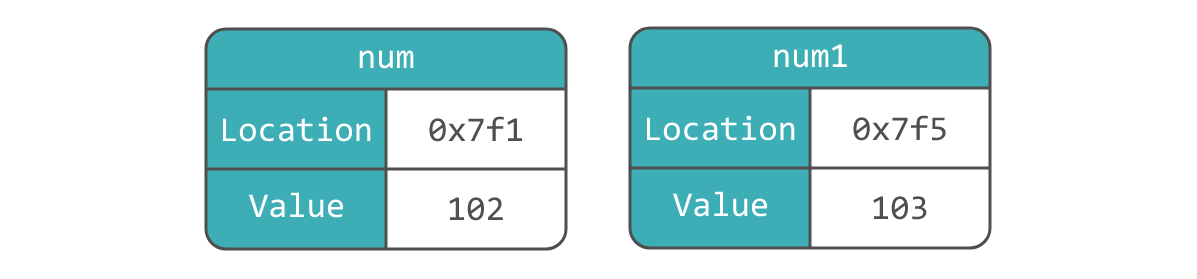

In [4]:
from IPython.display import Image, display

name = 'Новый проект (1) (3).png'
display(Image(filename=f'D:\\images\\{name}'))

Таким образом мы изменили значение переменной num1, но не ее местоположение. Кроме того, мы никак не повлияли на исходную переменную num.

С переменными в Python совершенно иная ситуация.

Переменные в Python

В Python нет переменных, как таковых, вместо них имена. Мы можем использовать термин переменные, однако важно понимать разницу между переменными и именами.

Давайте возьмём эквивалентный код из вышеприведённого примера на С (С++) и напишем его на Python:

In [ ]:
num = 101

Как и в C (С++), исполнение этой строки кода проходит через несколько этапов:

создаётся специальный объект PyObject
заполняется его поле Type, которое указывает на тип
заполняется его поле Value, которое указывает на значение
создаётся имя num
имя num начинает указывать на созданный PyObject
счётчик ссылок (поле Reference Count) объекта PyObject увеличивается на 1

Подробнее о счётчике ссылок (поле Reference Count) будет рассказано в уроке по сборщику мусора.

Если говорить о памяти, то это может выглядеть таким образом:

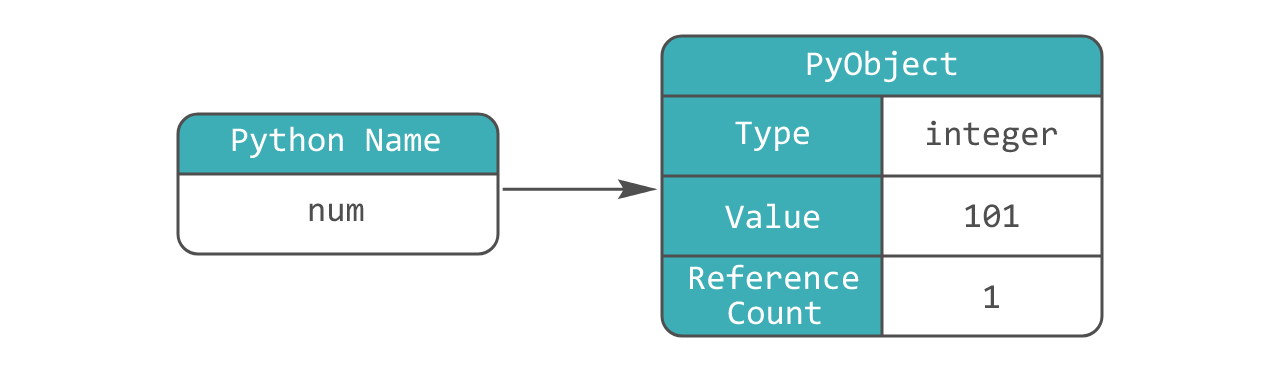

In [5]:
from IPython.display import Image, display

name = 'Новый проект (1) (4).png'
display(Image(filename=f'D:\\images\\{name}'))

Как мы видим, схема памяти в Python отличается от схемы в С (С++), показанной выше. Вместо того чтобы num владел блоком памяти, в котором хранится значение 101, этой памятью владеет PyObject объект.

Таким образом, в Python имя num не владеет напрямую каким-либо адресом в памяти.

Для присвоения нового значения имени num мы используем следующий код:

In [ ]:
num = 101
num = 102

Исполнение этой строки кода проходит через несколько этапов:

создаётся новый PyObject
заполняется его поле Type, которое указывает на тип
заполняется его поле Value, которое указывает на значение
имя num указывает на новый PyObject
счётчик ссылок (поле Reference Count) нового PyObject увеличивается на 1
счётчик ссылок (поле Reference Count) старого PyObject уменьшается на 1

Теперь схема памяти выглядит так:

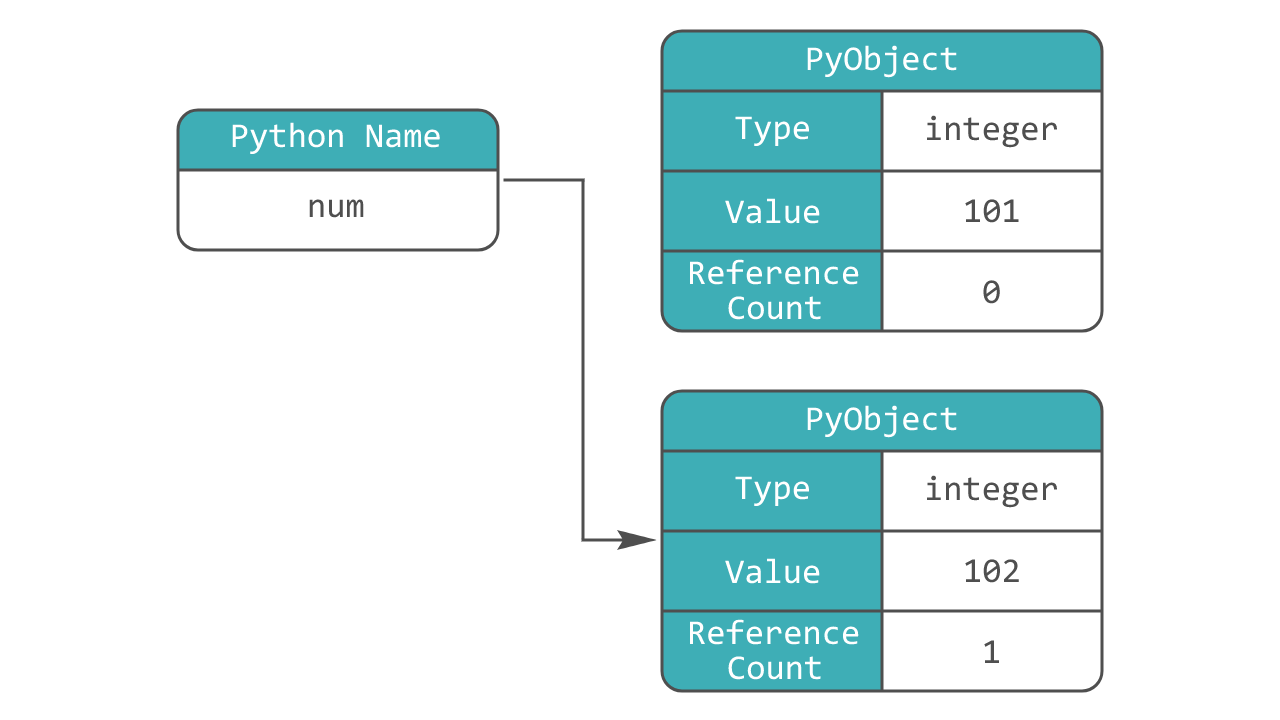

In [6]:
from IPython.display import Image, display

name = 'Новый проект (2) (1).png'
display(Image(filename=f'D:\\images\\{name}'))

Картинка выше демонстрирует, что num указывает на объект и не владеет областью памяти напрямую. Также мы видим, что строка кода num = 101 является не присваиванием, а, скорее, привязкой (binding) имени num к объекту.

Кроме того, предыдущий объект (содержавший значение 101) теперь находится в памяти со счётчиком ссылок, равным 0, и подлежит удалению с помощью сборщика мусора, о котором будет рассказано позже.

Мы можем ввести новое имя num1:

In [ ]:
num = 101
num = 102
num1 = num

В памяти появится новое имя num1, но не новый объект:

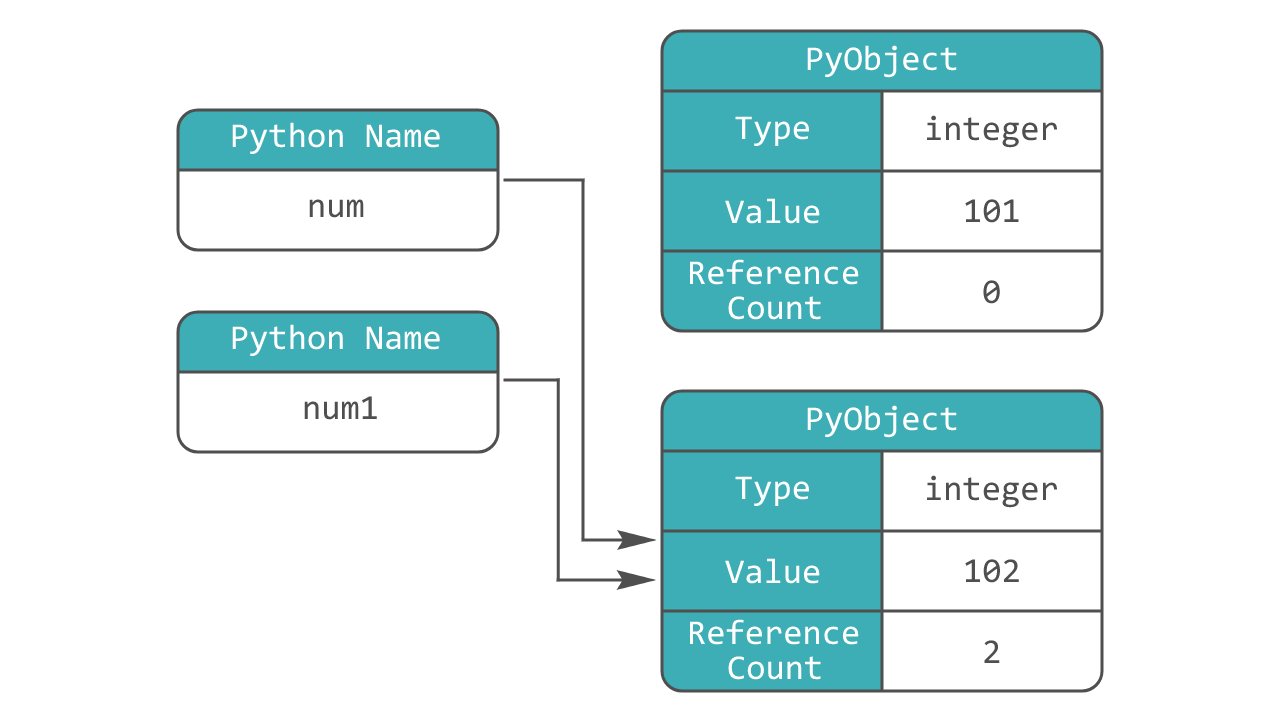

In [7]:
from IPython.display import Image, display

name = 'Новый проект (3) (1).png'
display(Image(filename=f'D:\\images\\{name}'))

Мы видим, что новый Python объект не создан, создано только новое имя, которое указывает на тот же объект. Кроме того, счётчик ссылок объекта увеличился на 1.

В Python мы не присваиваем переменные, а привязываем имена к объектам.

Примечание 3. PyObject определяется как C структура, которая характерна для CPython (стандартной реализации), и представляет базовую структуру всех объектов Python.